# Praktyczne Zastosowanie Drzew Decyzyjnych i Metod Ensemble w Analizie Danych

## Załadowanie danych

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Budowa Drzewa Decyzyjnego

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Podział danych na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicjalizacja modelu
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Ewaluacja modelu
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


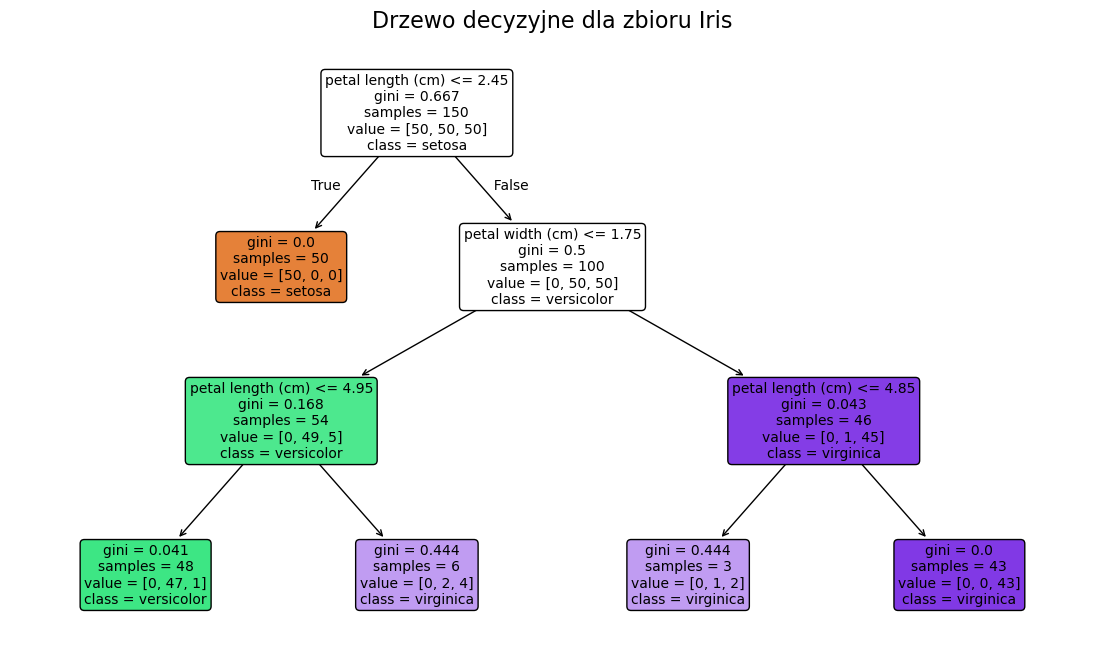

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1) Wczytanie zbioru danych Iris
iris = load_iris()
X, y = iris.data, iris.target

# 2) Trenowanie pojedynczego drzewa
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# 3) Wizualizacja drzewa
plt.figure(figsize=(14,8))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Drzewo decyzyjne dla zbioru Iris", fontsize=16)
plt.show()


## Budowa modelu Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Inicjalizacja modelu Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# Predykcja i ewaluacja modelu
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 1.0


## Boosting - Analiza danych w Pythonie z użyciem XGBoost

In [12]:
#! pip install xgboost

In [4]:
from xgboost import XGBClassifier

# Inicjalizacja modelu
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predykcja i ocena modelu
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 1.0



# Bagging (Bootstrap Aggregating) — przykład dla klasyfikacji

**Cel:** pokazać, jak użyć `BaggingClassifier` z bazowym drzewem decyzyjnym do poprawy jakości klasyfikacji na danych o nieliniowych granicach decyzyjnych.

**Idea w skrócie:**
- Tworzymy wiele *bootstrapowych* próbek zbioru treningowego.
- Na każdej próbce trenujemy słaby model (tu: `DecisionTreeClassifier`).
- Głosowanie większościowe (dla klasyfikacji) daje końcową predykcję.
- Często redukuje wariancję modelu bazowego i poprawia generalizację.

Poniżej kompletny, samodzielny przykład do uruchomienia w tej notatce.


In [5]:

# BaggingClassifier — przykład praktyczny
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1) Dane: nieliniowy problem (make_moons)
X, y = make_moons(n_samples=1200, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 2) Model bazowy: pojedyncze drzewo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)

# 3) Bagging: komitet drzew
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=200,        # liczba estymatorów (więcej -> niższa wariancja, kosztem czasu)
    max_samples=0.8,         # rozmiar bootstrapowej próbki względem zbioru treningowego
    bootstrap=True,          # włączone próbkowanie ze zwracaniem
    n_jobs=-1,               # równoległe trenowanie
    random_state=42,
    oob_score=True           # out-of-bag jako estymacja jakości bez walidacji
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)

print(f"Dokładność (pojedyncze drzewo): {acc_tree:.3f}")
print(f"Dokładność (Bagging 200× drzewo): {acc_bag:.3f}")
print("\nRaport klasyfikacji — Bagging:")
print(classification_report(y_test, y_pred_bag))

# Dodatkowo: wynik OOB (zbliżony do walidacyjnego)
print(f"OOB score (Bagging): {getattr(bag, 'oob_score_', None)}")

# Wskazówki dot. strojenia:
# - n_estimators: zwykle 50–300; więcej stabilizuje wynik kosztem czasu.
# - max_samples: 0.5–1.0; mniejsze wartości zwiększają zróżnicowanie bazowych modeli.
# - max_features: można ograniczyć liczbę cech dla jeszcze większej dywersyfikacji.
# - estimator: zamiast drzewa można użyć np. KNN, SVM (uwaga na czas).


Dokładność (pojedyncze drzewo): 0.873
Dokładność (Bagging 200× drzewo): 0.893

Raport klasyfikacji — Bagging:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       150
           1       0.91      0.87      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

OOB score (Bagging): 0.8833333333333333



## Wizualizacja pojedynczego drzewa z komitetu Bagging

Aby lepiej zrozumieć działanie metody **Bagging**, możemy podejrzeć strukturę jednego z drzew decyzyjnych użytych w komitecie.


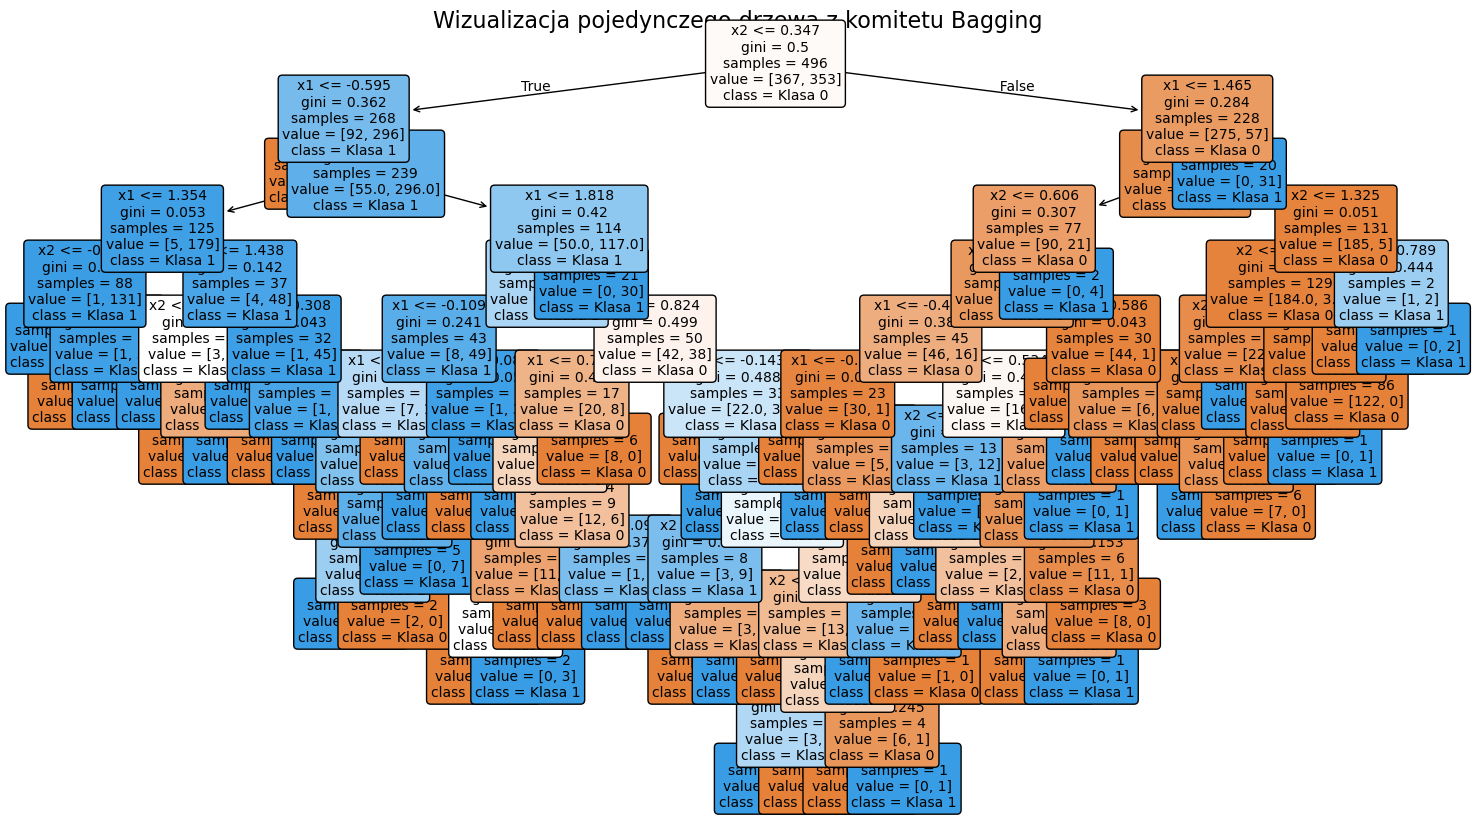

In [6]:

import matplotlib.pyplot as plt
from sklearn import tree

# Wybierz jedno z drzew z komitetu Bagging
estimator = bag.estimators_[0]

plt.figure(figsize=(18,10))
tree.plot_tree(
    estimator,
    filled=True,
    feature_names=["x1", "x2"],
    class_names=["Klasa 0", "Klasa 1"],
    rounded=True,
    fontsize=10
)
plt.title("Wizualizacja pojedynczego drzewa z komitetu Bagging", fontsize=16)
plt.show()
